# Feature Import

In [1]:
# Manipulação de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pré-processamento dos Dados
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modelos Utilizados
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Otimização
from sklearn.model_selection import train_test_split, GridSearchCV

# Métricas de Avaliação: Classificação
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay

In [17]:
dfs = pd.read_excel("../data/dados.xlsx", sheet_name = None, index_col = "Empresa")
print("DataFrames disponíveis: ", list(dfs.keys())) # representam indicadores de anos antes da falência

n = int(input("\nSelecione dados de 1 a 5 anos pré-falência: "))

DataFrames disponíveis:  ['df_1y', 'df_2y', 'df_3y', 'df_4y', 'df_5y']

Selecione dados de 1 a 5 anos pré-falência: 3


In [32]:
df = dfs[list(dfs.keys())[n-1]]
df.head()

,Dispon/PC,Dispon/Receita Liq Operacional,Dispon/AC,Dispon/AT,AC/PC,AC/AT,PC/AT,PC/Receita Liq Operacional,Estoque/AT,Quick assets/AT,...,VA/IMOBILIZADO,VA/AT,VA/RLO,Contas a pagar/RLO,AC/RLO,Estoque/RLO,NOWC/RLO,Contas a receber/RLO,RLO/AT,Alvo
Empresa,,,,,,,,,,,,,,,,,,,,,
BOMBRIL,0.006014,0.002968,0.010160,0.001904,0.591890,0.187412,0.316633,0.493520,0.024933,0.162479,...,0.661097,0.096696,0.150715,0.101836,0.292110,0.038861,0.064364,0.248904,0.641581,1
COSAN,0.619205,0.085355,0.389004,0.082146,1.591769,0.211170,0.132664,0.137846,0.051083,0.160088,...,NaN,-0.168142,-0.174710,0.037102,0.219418,0.053078,0.137194,0.049948,0.962410,0
METALFRIO,1.188879,0.506753,0.577486,0.411240,2.058714,0.712121,0.345906,0.426245,0.108425,0.603697,...,-0.446177,-0.074363,-0.091634,0.106727,0.877516,0.133607,0.732256,0.198623,0.811519,0
TAESA,0.161905,0.136656,0.155352,0.029167,1.042177,0.187745,0.180147,0.844051,NaN,0.187745,...,49.556333,0.145754,0.682908,0.031006,0.879651,NaN,0.236564,0.130914,0.213431,0
TUPY,1.424369,0.359718,0.551497,0.249257,2.582731,0.451964,0.174994,0.252546,0.061637,0.390326,...,-0.201133,-0.073750,-0.106434,0.079699,0.652257,0.088953,0.490554,0.121582,0.692922,0


# Feature Engineering

In [33]:
df.dropna(inplace = True)

In [34]:
df["Alvo"].value_counts()

0    26
1    20
Name: Alvo, dtype: int64

In [35]:
X = df.drop("Alvo", axis = 1)
y = df["Alvo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### Padronização

In [36]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

#### Análise de Componentes Principais (PCA)

In [37]:
pca = PCA()
X_train = pca.fit_transform(X_train_norm)
X_test = pca.transform(X_test_norm)

In [38]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.22, 0.38, 0.51, 0.61, 0.69, 0.75, 0.79, 0.83, 0.87, 0.9 , 0.92,
       0.94, 0.96, 0.97, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  ])

# Modelling

### Logistic Regression

In [39]:
modelo = LogisticRegression(max_iter = 1000, random_state = 42)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<AxesSubplot:title={'center':'Probabilidades'}>

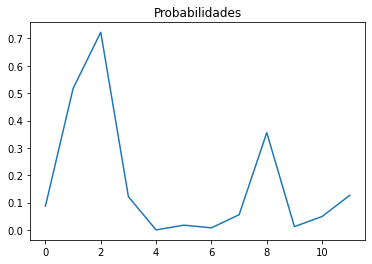

In [40]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba_train = modelo.predict_proba(X_train)[:,1]
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [41]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[19  0]
 [ 1 14]]

0.9705882352941176

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.93      0.97        15

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [42]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[7 0]
 [3 2]]

0.75

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.40      0.57         5

    accuracy                           0.75        12
   macro avg       0.85      0.70      0.70        12
weighted avg       0.82      0.75      0.72        12



AUC - Teste : 0.7142857142857144


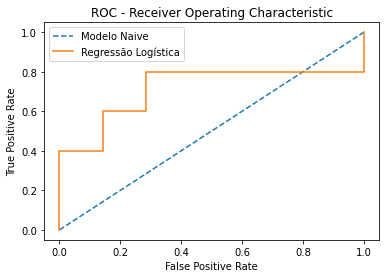

In [43]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Regressão Logística')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Random Forest

Hiperparâmetros a serem otimizados:

* n_estimators -> número de árvores distintas estimadas (padrão: 10 -> pode ser muito pequeno)
* max_features -> número máximo de variáveis independentes a ser considerado em cada nó das árvores de decisão (padrão: raiz quadrada da quantidade de variáveis independentes imputada ao modelo, o que é uma boa medida)

In [14]:
# Cross-validation
modelo = RandomForestClassifier(random_state = 42)

parametros = {'max_depth': [10, 20, 30, None],
              'min_samples_leaf': [1, 3, 5, 7],
              'min_samples_split': [2, 6, 10, 14],
              'n_estimators': [25, 50, 100, 200, 500, 1000],
              'criterion': ["gini", 'entropy']}

melhor_modelo = GridSearchCV(modelo, parametros, n_jobs = -1, cv = 2, scoring = "roc_auc")
melhor_modelo.fit(X_train, y_train)

print('Melhor conjunto de parâmetros:\n', melhor_modelo.best_params_)

KeyboardInterrupt: 

In [ ]:
modelo = RandomForestClassifier(random_state = 42, verbose = True, criterion = "gini", max_depth = 10, min_samples_leaf = 7, min_samples_split = 2, n_estimators = 100)
modelo.fit(X_train, y_train)

In [ ]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [ ]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

In [ ]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

In [ ]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Neural Network

Hiperparâmetros a serem otimizados:

* hidden_layer_sizes -> tupla contendo o número de neurônios dentro de cada camada (padrão: uma camada de 100 neurons)
* max_iter -> número máximo de iterações a serem realizadas pelo método de backpropagation
* alpha -> o valor máximo de alteração dos coeficientes em cada iteração, para minimizar a função de custo (padrão: 0.0001)
* solver -> Algoritmo utilizado para encontrar a solução ótima, cujo tempo de obtenção da resposta varia. Opções: 'lbfgs', 'sgd' e 'adam'.

In [ ]:
# Cross-validation
#modelo = MLPClassifier(max_iter = 100)

#parametros = {'hidden_layer_sizes': [(50,50), (50,100,50), (100,)],
#               'activation': ['tanh', 'relu'],
#               'solver': ['sgd', 'adam', "lbfgs"],
#               'alpha': [0.0001, 0.05],
#               'learning_rate': ['constant','adaptive'],
#               'max_iter': [5, 15, 25, 50, 100]}

# melhor_modelo = GridSearchCV(modelo, parametros, n_jobs = -1, cv = 2, scoring = "roc_auc")
# melhor_modelo.fit(X_train, y_train)

# print('Melhor conjunto de parâmetros:\n', melhor_modelo.best_params_)

In [ ]:
# Para não ter que rodar novamente...
modelo = MLPClassifier(activation = "tanh", alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = "constant", max_iter = 100, solver = "adam", verbose = True, random_state = 42)
modelo.fit(X_train, y_train)

In [ ]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [ ]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

In [ ]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

In [ ]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

In [ ]:
# Curva de Custo
pd.Series(modelo.loss_curve_).plot(title = "Loss Curve")